# Fase 3: Data Preparation

## 1. Tratamiento de Missing Values

In [ ]:
# Eliminar registros sin país
winter = winter.dropna(subset=['Country'])
summer = summer.dropna(subset=['Country'])

# Rellenar datos socioeconómicos faltantes con mediana
dictionary['GDP per Capita'] = dictionary['GDP per Capita'].fillna(dictionary['GDP per Capita'].median())
dictionary['Population'] = dictionary['Population'].fillna(dictionary['Population'].median())

In [ ]:
print("Valores faltantes Dictionary:")
print(dictionary.isnull().sum())

Valores faltantes Dictionary:
Country              0
Code                 0
Population           0
GDP per Capita       0
GDP_scaled           0
Population_scaled    0
dtype: int64


## 2. Tratamiento de Outliers

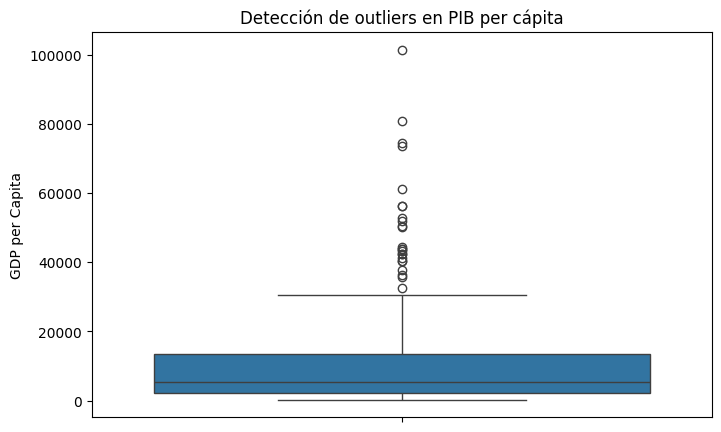

,Country,Code,Population,GDP per Capita,GDP_scaled,Population_scaled
0,Afghanistan,AFG,32526562.0,594.323081,-0.676793,-0.028715
1,Albania,ALB,2889167.0,3945.217582,-0.476750,-0.243574
2,Algeria,ALG,39666519.0,4206.031232,-0.461180,0.023047
3,American Samoa*,ASA,55538.0,5233.583395,-0.399836,-0.264117
4,Andorra,AND,70473.0,5233.583395,-0.399836,-0.264009


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(dictionary['GDP per Capita'])
plt.title("Detección de outliers en PIB per cápita")
plt.show()

# Escalado de variables
scaler = StandardScaler()
dictionary[['GDP_scaled','Population_scaled']] = scaler.fit_transform(dictionary[['GDP per Capita','Population']])
dictionary.head()

## 3. Transformaciones y nuevas variables

In [ ]:
# Número de medallas por país
summer['Medal_Won'] = 1
medals_by_country = summer.groupby('Country')['Medal_Won'].sum().reset_index()

In [ ]:
medals_by_country

,Country,Medal_Won
0,AFG,2
1,AHO,1
2,ALG,15
3,ANZ,29
4,ARG,259
...,...,...
142,VIE,2
143,YUG,435
144,ZAM,2
145,ZIM,23
